## Introduction
The goal of this project is to wrangle the WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The challenge lies in the fact that the Twitter archive is great, but it only contains very basic tweet information that comes in JSON format. For a successful project, I needed to gather, asses and clean the Twitter data for a worthy analysis and visualization.

## Gathering data
* Import Manually Downloaded Data: twitter_archive_enhanced.csv

Import Programmatically Downloaded Data: The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

Import Data from Twitter API:  Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [79]:
import requests
import os
import pandas as pd
import json
import tweepy


In [419]:
df=pd.read_csv('twitter-archive-enhanced.csv')

In [421]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [58]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response=requests.get(url)
response

with open(url.split('/')[-1],mode='wb') as file:
    file.write(response.content)

In [248]:
image_df=pd.read_csv('image-predictions.tsv',sep='\t')


In [424]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [879]:
import tweepy
import timeit

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)



In [69]:
# Query Twitter API using tweet_id information from the df
tweet_ids = list(df.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print("Error for: " + str(tweet))

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 845459076796616705
Error for: 842892208864923648
Error for: 837012587749474308
Error for: 827228250799742977
Error for: 802247111496568832
Error for: 775096608509886464
Error for: 770743923962707968


Rate limit reached. Sleeping for: 748


Error for: 754011816964026368


Rate limit reached. Sleeping for: 752


In [86]:
#create tweet_json.txt to store json data from the API
with open('tweet_json.txt', 'w') as json_file:  
    json.dump(tweet_data, json_file)

In [87]:
#read json file into dataframe
twitter_api_df = pd.read_json('tweet_json.txt',orient='index')

In [90]:
twitter_api_df.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...",2535,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,504,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...",128,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...",124,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,43,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...",294,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,139,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...",107,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,41,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Data Assessment 


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [95]:
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [259]:
#check the dog names with count
df.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Tucker        10
Penny         10
Lola          10
Bo             9
Winston        9
the            8
Sadie          8
Buddy          7
Bailey         7
Toby           7
Daisy          7
an             7
Bella          6
Rusty          6
Koda           6
Dave           6
Leo            6
Oscar          6
Jax            6
Scout          6
Stanley        6
Jack           6
Milo           6
Sunny          5
            ... 
Kanu           1
Hermione       1
Rumpole        1
Godzilla       1
Lucky          1
Jebberson      1
Leonidas       1
Mitch          1
Beya           1
Wishes         1
Ronnie         1
Jessifer       1
Ben            1
Bronte         1
Ricky          1
Hanz           1
Raphael        1
Rhino          1
Tuco           1
Scott          1
Adele          1
Devón          1
Ed             1
Mya            1
Corey          1
Autumn         1
Jangle         1
Howie         

In [422]:
#check if rating_numerator not matching the rating from text
df[df.apply(lambda x: str(x.rating_numerator) not in x.text, axis=1)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [423]:
#Check if the duplicated name refers to the same tweet
df[(df.name.duplicated()) & (df.name!='None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
60,880465832366813184,NaN,NaN,2017-06-29 16:39:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She had her first beach experie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880465832...,12,10,Bella,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
115,870374049280663552,NaN,NaN,2017-06-01 20:18:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She really likes the planet. Wou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/870374049...,13,10,Zoey,None,None,None,None
120,869702957897576449,NaN,NaN,2017-05-30 23:51:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stanley. He likes road trips. Will shift ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869702957...,13,10,Stanley,None,None,None,None
123,868880397819494401,NaN,NaN,2017-05-28 17:23:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walter. He won't start hydrotherapy wi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
135,866450705531457537,NaN,NaN,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None


In [670]:
#check ratings with high denominator
df[df.rating_denominator>10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [671]:
#check ratings with low denominator
low_denom=df[(df.rating_denominator<10)]
low_denom

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [672]:
low_denom.text.tolist()

["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
 'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv']

In [662]:
high_numerator=df_tweet[(df_tweet.rating_numerator>15)&(df_tweet.rating_denominator==10)]
high_numerator

In [663]:
high_numerator

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,breed,conf,favorite_count,retweet_count
294,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",75,10,Logan,None,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,19494,6694
328,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,pupper,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,Clumber,0.946718,7000,1775
449,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af....,1776,10,Atticus,None,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,Unidentifiable,0.000000,5396,2640
1087,670842764863651840,2015-11-29 05:52:33,After so many requests... here you go.\n\nGood...,420,10,None,None,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,Unidentifiable,0.000000,25012,8997


In [676]:
high_numerator.text.tolist()

["This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 "This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh",
 'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY']

In [118]:
twitter_api_df.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...",2535,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,504,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...",128,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...",124,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,43,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...",294,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,139,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...",107,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,41,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [328]:
twitter_api_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2342 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
entities                         2342 non-null object
extended_entities                1823 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null int64
geo                              0 non-null float64
tweet_id                         2342 non-null int64
id_str                           2342 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

In [425]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [329]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Quality 

#### df Table

* There are 181 retweeted data and 78 tweets that are replies

* Timestamp is a string not Datetime

* Tweet id is int not a string

* Missing values for name column(None)

* Mislabelled dog names.the,an,a are classified as names of dogs

* Inaccurate values for Numerator and denominator ratings.

     Tweet Id 722974582966214656 has rating 4/20 instead of 13/10
     
     Tweet ID 666287406224695296 has rating 1/2 instead of 9/10
     
     Tweet with rating 24/7 has no rating(0/0)
     
     Tweet with rating_numerator 75 should be replaced with 9,rating_numerator 27 with 11.
     
     Tweet with rating_numerator 420 is not a dog but image of singer Snoop Dogg.
     
 
* Inconsistent value for rating_denominator,not all tweets have denominator of 10.

#### image_df Table:

* Columns p1,p1_conf,p1_dog,p2,p2_conf,p2_dog ,p3,p3_conf,p3_dog can be condensed into 2 columns breed and confidence.

*  Column 'breed' has _ between the words and lowercase letters.

* Tweet id is int not a string


#### twitter_api_df Table:

* Rename the id column to "tweet_id" to match the other 2 tables
* 176 records have a retweeted_status and 77 replies


### Tidyness 

* Columns(doggo,puppo,pupper,floofer) should be combined into a single column named "dog_stage"
* id column is a number not a string
* The table has datetime index
* tweet_id labelled as id
* df and twitter_api_df tables Contains several columns with non-useful information.
* Consolidate the twitter_api_df table into the following columns: tweet_id, retweet count, favorite count,text

## Cleaning data

In [793]:
# Copy the dataframes 
df_clean = df.copy()
image_df_clean = image_df.copy()
twitter_api_df_clean = twitter_api_df.copy()

## Tidiness

#### Define


Remove rows that are retweets or responses and delete their respective columns

#### Code

In [794]:
df_clean=df_clean[(df_clean.in_reply_to_status_id.isnull())&(df_clean.retweeted_status_id.isnull())]


In [795]:
twitter_api_df_clean=twitter_api_df_clean[(twitter_api_df_clean.in_reply_to_status_id.isnull())
                                          &(twitter_api_df_clean.retweeted_status.isnull())]

#### Test

In [796]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [797]:
twitter_api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2097 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2097 non-null datetime64[ns]
entities                         2097 non-null object
extended_entities                1726 non-null object
favorite_count                   2097 non-null int64
favorited                        2097 non-null int64
geo                              0 non-null float64
tweet_id                         2097 non-null int64
id_str                           2097 non-null int64
in_reply_to_screen_name          0 non-null object
in_reply_to_status_id            0 non-null float64
in_reply_to_status_id_str        0 non-null float64
in_reply_to_user_id              0 non-null float64
in_reply_to_user_id_str          0 non-null float64
is_quote_status                  2097 no

#### Define

#### Remove columns with non useful information from df_clean

In [798]:
df_clean=df_clean.drop(['source','in_reply_to_status_id','in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

In [799]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(7)
memory usage: 180.2+ KB


#### Combine the Dog stages into one column names "dog_stages"

#### Code

In [800]:
#Create a list to store dog_stages
dog_stage=[]

#create a function with nested if to capture the dog stage 

def condense(row_df):
    
    if row_df['doggo']!='None':
        dog_stage.append('doggo')
    elif row_df['puppo']!='None':
        dog_stage.append('puppo')
    elif row_df['pupper']!='None':
        dog_stage.append('pupper')
    elif row_df['floofer']!='None':
        dog_stage.append('floofer')
    else:
        dog_stage.append('None')

        
#Apply the condense function to the df_Clean table
df_clean.apply(condense,axis=1)

#create new column 'dog_stage'
df_clean['dog_stage'] = dog_stage
df_clean.drop(columns=['doggo','pupper','puppo','floofer'], inplace=True)



#### Test

In [801]:
df_clean.head()


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,None


In [802]:
df_clean.dog_stage.value_counts()

None       1761
pupper      221
doggo        83
puppo        23
floofer       9
Name: dog_stage, dtype: int64

#### Define

Rename the "id" column to "tweet_id" to match the other 2 datasets

#### Code

In [803]:
twitter_api_df_clean.rename({"id": "tweet_id"}, axis=1, inplace=True)

#### Test

In [804]:
list(twitter_api_df_clean)

['contributors',
 'coordinates',
 'created_at',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'geo',
 'tweet_id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'text',
 'truncated',
 'user']

#### Define


Reset index and extract only  twitter_id, retweet _count and favourite_count from twitter api table

#### Code

In [805]:
twitter_api_df_clean.reset_index(drop=True,inplace=True)

twitter_api_df_clean=twitter_api_df_clean[['tweet_id', 'favorite_count', 'retweet_count']]

#### Test

In [806]:
list(twitter_api_df_clean)

['tweet_id', 'favorite_count', 'retweet_count']

#### Define

Condense the p1,p2,p3 into dog breed column and p1_conf,p2_conf,p3_conf into conf column

#### Code

In [807]:

# condense the p1,p2,p3 into dog breed column and p1_conf,p2_conf,p3_conf into conf column
breed = []
conf = []

def breed_confidence(row_df):
    if row_df['p1_dog'] == True:
        breed.append(row_df['p1'])
        conf.append(row_df['p1_conf'])
    elif row_df['p2_dog'] == True:
        breed.append(row_df['p2'])
        conf.append(row_df['p2_conf'])
    elif row_df['p3_dog'] == True:
        breed.append(row_df['p3'])
        conf.append(row_df['p3_conf'])
    else:
        breed.append('Unidentifiable')
        conf.append(0)
      
    

image_df_clean.apply(breed_confidence, axis=1)
image_df_clean['breed'] = breed
image_df_clean['conf'] = conf
image_df_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',], axis=1, inplace=True)


#### Test

In [808]:
image_df_clean.head()

,tweet_id,jpg_url,img_num,breed,conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


#### Define

Use an inner join to combine the datasets together into a single dataframe

#### Code

In [822]:
#Merge the 3 dataframes
df_tweet = pd.merge(df_clean, image_df_clean,on='tweet_id', how='inner')
df_tweet = pd.merge(df_tweet, twitter_api_df_clean,on='tweet_id', how='inner')

#### Test

In [823]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 0 to 1283
Data columns (total 13 columns):
tweet_id              1284 non-null int64
timestamp             1284 non-null object
text                  1284 non-null object
rating_numerator      1284 non-null int64
rating_denominator    1284 non-null int64
name                  1284 non-null object
dog_stage             1284 non-null object
jpg_url               1284 non-null object
img_num               1284 non-null int64
breed                 1284 non-null object
conf                  1284 non-null float64
favorite_count        1284 non-null int64
retweet_count         1284 non-null int64
dtypes: float64(1), int64(6), object(6)
memory usage: 140.4+ KB


### Quality

#### Define

Replace the underscore in the breed column and make text more readable.

#### Code

In [824]:
df_tweet['breed'] = df_tweet['breed'].str.replace('_', ' ').str.title()


#### Test

In [825]:
df_tweet.head()


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,breed,conf,favorite_count,retweet_count
0,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,24625,4078
1,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,0.168086,41475,8477
2,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,39639,9170
3,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,0.425595,19907,3052
4,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,13,10,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,64332,18508


#### Define

Erroneous datatypes ( tweet_id ,timestamp and dog stage columns ).

Convert tweet_id to string,timestamp to datetime and dog_stage to category data type

#### Code

In [826]:
df_tweet['tweet_id']=df_tweet.tweet_id.astype(str)

In [827]:

df_tweet['timestamp'] = pd.to_datetime(df_tweet['timestamp'])

In [828]:
df_tweet.dog_stage=df_tweet.dog_stage.astype('category')


#### Test

In [829]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 0 to 1283
Data columns (total 13 columns):
tweet_id              1284 non-null object
timestamp             1284 non-null datetime64[ns]
text                  1284 non-null object
rating_numerator      1284 non-null int64
rating_denominator    1284 non-null int64
name                  1284 non-null object
dog_stage             1284 non-null category
jpg_url               1284 non-null object
img_num               1284 non-null int64
breed                 1284 non-null object
conf                  1284 non-null float64
favorite_count        1284 non-null int64
retweet_count         1284 non-null int64
dtypes: category(1), datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 131.9+ KB


#### Define

For Tweet Id 722974582966214656 replace rating 4/20 with 13/10
For Tweet ID 666287406224695296 replace rating 1/2 with 9/10


#### Code

In [830]:
df_tweet.loc[df_tweet.tweet_id =='722974582966214656', 'rating_numerator'] = 13
df_tweet.loc[df_tweet.tweet_id =='722974582966214656', 'rating_denominator'] = 10

df_tweet.loc[df_tweet.tweet_id =='666287406224695296', 'rating_numerator'] = 9
df_tweet.loc[df_tweet.tweet_id =='666287406224695296', 'rating_denominator'] = 10

#### Test

In [831]:
df_tweet.loc[df_tweet['tweet_id'] =='722974582966214656']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,breed,conf,favorite_count,retweet_count
555,722974582966214656,2016-04-21 02:25:47,Happy 4/20 from the squad! 13/10 for all https...,13,10,None,None,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great Dane,0.246762,4298,1673


In [832]:
df_tweet.loc[df_tweet['tweet_id'] =='666287406224695296']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,breed,conf,favorite_count,retweet_count
1271,666287406224695296,2015-11-16 16:11:11,This is an Albanian 3 1/2 legged Episcopalian...,9,10,an,None,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese Dog,0.857531,145,64


#### Define

 Tweet with denominator of 7 have no rating.Replace 24/7 with 0/0.

#### Code

In [833]:
df_tweet.loc[df_tweet.rating_denominator==7, 'rating_numerator']=0
df_tweet.loc[df_tweet.rating_denominator==7, 'rating_denominator']=10


#### Test

In [834]:
#Check to see there is no records with rating_denominator==7
df_tweet.loc[df_tweet.rating_denominator==7]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,breed,conf,favorite_count,retweet_count


#### Define

Replace Tweet with rating_numerator 75 with 9,rating_numerator 27 with 11.
Remove the Tweet with rating_numerator 420.

#### Code

In [835]:
df_tweet.loc[df_tweet.rating_numerator==75, 'rating_numerator']=9
df_tweet.loc[df_tweet.rating_numerator==27, 'rating_numerator']=11
df_tweet = df_tweet[df_tweet.rating_numerator != 420]

#### Test

In [836]:
df_tweet.loc[(df_tweet.rating_numerator==75) |(df_tweet.rating_numerator==27)|(df_tweet.rating_numerator == 420)]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,breed,conf,favorite_count,retweet_count


#### Define

Inconsistent value for rating_denominator,not all tweets have denominator of 10.
Create new column 'rating'=(rating_numerator/rating_denominator)*10 to get common denominator(10) for all ratings

#### Code

In [767]:
df_tweet1=df_tweet.copy()

In [842]:
#Create a list to store ratings
ratings=[]

#create a function to get ratings so that denominator is 10 for all the records 

def get_rating(row_df):
    
    if(row_df.rating_denominator==0):
        rating=0
        
    else:
        rating=(row_df.rating_numerator/row_df.rating_denominator)*10
    
    ratings.append(rating)
    

        
#Apply the get_rating function to the df_clean table
df_tweet.apply(get_rating,axis=1)

#create new column 'rating'
df_tweet['rating'] = ratings

df_tweet['rating']=df_tweet['rating'].astype(int)
df_tweet.drop(columns=['rating_numerator','rating_denominator'], inplace=True)

#### Test

In [843]:
df_tweet.head()

,tweet_id,timestamp,text,name,dog_stage,jpg_url,img_num,breed,conf,favorite_count,retweet_count,rating
0,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,24625,4078,12
1,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,0.168086,41475,8477,13
2,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,39639,9170,12
3,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,0.425595,19907,3052,13
4,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,64332,18508,13


#### Define

Mislabelled dog names.the,an,a are classified as names of dogs.

Check samples of tweets to see how name is referenced.Extract the names of dogs from the text column

#### Code

In [844]:
#Check samples of tweets to see how name is referenced
df_tweet[df_tweet.name!='None'].sample(30).text

323     This is Jay. He's really h*ckin happy about th...
1015    This is Frankie. He's wearing blush. 11/10 rea...
472     This is Lenox. She's in a wheelbarrow. Silly d...
245     This is Ronnie. He hopes you're having a great...
227     This is Ito. He'll be your uber driver tonight...
946     Meet Reggie. He's going for the world record. ...
1134    This is Julio. He was one of the original Ring...
1033    This is a baby Rand Paul. Curls for days. 11/1...
671     This is Sansa. She's gotten too big for her ch...
740     This is Dunkin. He can only see when he's wet ...
895     This is Bella. She just learned that her final...
857     This is Cheesy. It's her birthday. She's patie...
1126    This is Sandra. She's going skydiving. Nice ad...
230     This is Stephan. He just wants to help. 13/10 ...
918     Meet Ash. He's just a head now. Lost his body ...
791     This is Tyrone. He's a leaf wizard. Self-motiv...
598     Meet Winston. He's trapped in a cup of coffee....
193     This i

In [845]:
import re

#List to store the extracted names 
names = []

#Create a temporary column to store words from text
df_tweet['text_split'] = df_tweet['text'].str.split()


#Function to Extract the names of dogs from the text column
def extract_names(row):
    
    # 'This is Lucy'
    if row['text'].startswith('This is ') and re.match(r'[A-Z][a-z].*', row['text_split'][2]):
            names.append(row['text_split'][2].strip('.').strip(','))
    
    # 'Meet Lucy'
    elif row['text'].startswith('Meet ') and re.match(r'[A-Z][a-z].*', row['text_split'][1]):
            names.append(row['text_split'][1].strip('.').strip(','))
    
    # 'Say hello to Lucy'
    elif row['text'].startswith('Say hello to ') and re.match(r'[A-Z][a-z].*', row['text_split'][3]):
            names.append(row['text_split'][3].strip('.').strip(','))
    
    #Store 'None' if name not found
    else:
        names.append('None')
        

#Apply the extract_names function to data_merge        
df_tweet.apply(extract_names, axis=1)
df_tweet.drop(['text_split'],axis=1,inplace=True)
df_tweet['name'] = names


#### Test

In [846]:
df_tweet.name.value_counts()

None        429
Oliver        8
Winston       7
Tucker        7
Penny         6
Lucy          6
Cooper        6
Bella         5
Sadie         5
Bailey        5
Lola          5
Toby          4
Sophie        4
Dexter        4
Clark         4
Clarence      4
George        3
Shadow        3
Malcolm       3
Louis         3
Maggie        3
Bo            3
Duke          3
Milo          3
Finn          3
Scout         3
Stanley       3
Gary          3
Ellie         3
Koda          3
           ... 
Mosby         1
Snickers      1
Jeb           1
Craig         1
Bubba         1
Remy          1
Jennifur      1
Ava           1
Jed           1
Harvey        1
Wesley        1
Bobble        1
Bubbles       1
Kayla         1
Maya          1
Luca          1
Evy           1
Keurig        1
Georgie       1
Nigel         1
Harnold       1
Asher         1
Aspen         1
Misty         1
Creg          1
Hurley        1
Rorie         1
Shawwn        1
Jomathan      1
Baloo         1
Name: name, Length: 647,

In [847]:
#check for 'a','an,'the' in name column
df_tweet[(df_tweet['name']=='a')|(df_tweet['name']=='an')|(df_tweet['name']=='the')]

,tweet_id,timestamp,text,name,dog_stage,jpg_url,img_num,breed,conf,favorite_count,retweet_count,rating


## Storing, Analyzing, and Visualizing Data

In [848]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283 entries, 0 to 1283
Data columns (total 12 columns):
tweet_id          1283 non-null object
timestamp         1283 non-null datetime64[ns]
text              1283 non-null object
name              1283 non-null object
dog_stage         1283 non-null category
jpg_url           1283 non-null object
img_num           1283 non-null int64
breed             1283 non-null object
conf              1283 non-null float64
favorite_count    1283 non-null int64
retweet_count     1283 non-null int64
rating            1283 non-null int32
dtypes: category(1), datetime64[ns](1), float64(1), int32(1), int64(3), object(5)
memory usage: 116.7+ KB


In [849]:
#Store the clean DataFrame in a CSV file
df_tweet.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [850]:
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

#### Descriptive statistics

In [851]:
df_tweet.describe()

,img_num,conf,favorite_count,retweet_count,rating
count,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000
mean,1.185503,0.463185,8214.375682,2483.310210,11.843336
std,0.538567,0.338180,11477.709397,4011.220588,49.337858
min,1.000000,0.000000,80.000000,12.000000,0.000000
25%,1.000000,0.141772,1681.000000,570.000000,10.000000
50%,1.000000,0.457356,3778.000000,1238.000000,11.000000
75%,1.000000,0.769041,10112.500000,2946.500000,12.000000
max,4.000000,0.999956,127325.000000,61117.000000,1776.000000


#### Observations:

The neural network algorithm's #1 prediction for the image in the tweet has mean prediciton of 0.587.

Mean rating for a dog was 12.75 with an outlier of 1776

Mean retweet count for an original tweet was 2488 and a maximum value of 61117.

Mean favorite count for an original tweet was 8227 and a maximum value of 127325.

In [855]:
df_tweet[df_tweet.rating==1776].text[449]

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

This is special rating with 1776 indicating USA independence year.

In [860]:
df_tweet.rating.value_counts()

10      302
12      288
11      250
13      153
9        98
8        64
7        35
6        22
5        19
14       17
3        13
4        12
2         5
1         3
1776      1
0         1
Name: rating, dtype: int64

In [642]:
df_tweet.breed.value_counts()[:10]

Unidentifiable        199
Golden Retriever      107
Pembroke               70
Labrador Retriever     67
Chihuahua              55
Pug                    44
Pomeranian             27
Chow                   26
Toy Poodle             25
Cocker Spaniel         24
Name: breed, dtype: int64

In [866]:
df_tweet.name.value_counts()

None        429
Oliver        8
Winston       7
Tucker        7
Penny         6
Lucy          6
Cooper        6
Bella         5
Sadie         5
Bailey        5
Lola          5
Toby          4
Sophie        4
Dexter        4
Clark         4
Clarence      4
George        3
Shadow        3
Malcolm       3
Louis         3
Maggie        3
Bo            3
Duke          3
Milo          3
Finn          3
Scout         3
Stanley       3
Gary          3
Ellie         3
Koda          3
           ... 
Mosby         1
Snickers      1
Jeb           1
Craig         1
Bubba         1
Remy          1
Jennifur      1
Ava           1
Jed           1
Harvey        1
Wesley        1
Bobble        1
Bubbles       1
Kayla         1
Maya          1
Luca          1
Evy           1
Keurig        1
Georgie       1
Nigel         1
Harnold       1
Asher         1
Aspen         1
Misty         1
Creg          1
Hurley        1
Rorie         1
Shawwn        1
Jomathan      1
Baloo         1
Name: name, Length: 647,

In [ ]:
Pics of dogs that are unidentifiable by the neural network

In [869]:
df_tweet[df_tweet.breed=='Unidentifiable']

,tweet_id,timestamp,text,name,dog_stage,jpg_url,img_num,breed,conf,favorite_count,retweet_count,rating
13,887517139158093824,2017-07-19 03:39:09,I've yet to rate a Venezuelan Hover Wiener. Th...,None,None,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,Unidentifiable,0.0,45531,11457,14
18,886680336477933568,2017-07-16 20:14:00,This is Derek. He's late for a dog meeting. 13...,Derek,None,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,Unidentifiable,0.0,22071,4379,13
32,881268444196462592,2017-07-01 21:49:04,Meet Elliot. He's a Canadian Forrest Pup. Unus...,Elliot,None,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,Unidentifiable,0.0,22724,5086,12
39,879050749262655488,2017-06-25 18:56:45,This is Steven. He has trouble relating to oth...,Steven,None,https://pbs.twimg.com/media/DDMD_phXoAQ1qf0.jpg,1,Unidentifiable,0.0,22211,4646,11
60,870804317367881728,2017-06-03 00:48:22,Real funny guys. Sending in a pic without a do...,None,None,https://pbs.twimg.com/media/DBW35ZsVoAEWZUU.jpg,1,Unidentifiable,0.0,33321,6183,11
72,864873206498414592,2017-05-17 16:00:15,We only rate dogs. Please don't send in Jesus....,None,None,https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg,2,Unidentifiable,0.0,32361,8790,14
77,862457590147678208,2017-05-11 00:01:27,"This is Jersey. He likes to watch movies, but ...",Jersey,None,https://pbs.twimg.com/media/C_gQmaTUMAAPYSS.jpg,1,Unidentifiable,0.0,20662,5037,13
81,860276583193509888,2017-05-04 23:34:55,This is Jordy. He likes to go on adventures an...,Jordy,None,https://pbs.twimg.com/media/C_BQ_NlVwAAgYGD.jpg,1,Unidentifiable,0.0,18454,3544,12
82,860184849394610176,2017-05-04 17:30:24,Here we have perhaps the wisest dog of all. Ab...,None,None,https://pbs.twimg.com/media/C-_9jWWUwAAnwkd.jpg,1,Unidentifiable,0.0,16832,5955,14
102,853299958564483072,2017-04-15 17:32:18,This is Rumpole. He'll be your Uber driver thi...,Rumpole,None,https://pbs.twimg.com/media/C9eHyF7XgAAOxPM.jpg,1,Unidentifiable,0.0,15926,3730,13


Images corresponding to Unidentifiable breed is due to smaller relative size of the dog in comparison to its surrounding which makes prediction with machine learning hard.

For the neural network to be effective in predicting the dog breed,image of the dog needs to be prominent

### Most Retweeted tweets

In [486]:
df_tweet=df_tweet[df_tweet.breed!='Unidentifiable']

In [643]:
df_most_retweets=df_tweet.sort_values('retweet_count',ascending=False)

In [644]:
df_most_retweets.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,breed,conf,favorite_count,retweet_count
230,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,13,10,Stephan,None,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,127325,61117
188,819004803107983360,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14...,14,10,Bo,doggo,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,Standard Poodle,0.351308,92120,40144
893,678399652199309312,2015-12-20 02:20:55,This made my day. 12/10 please enjoy https://t...,12,10,None,None,https://pbs.twimg.com/ext_tw_video_thumb/67839...,1,Bedlington Terrier,0.015047,82477,33879
928,676219687039057920,2015-12-14 01:58:31,This is Kenneth. He's stuck in a bubble. 10/10...,10,10,Kenneth,None,https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg,1,Whippet,0.000132,77606,32740
383,761672994376806400,2016-08-05 21:19:27,Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,10,10,None,None,https://pbs.twimg.com/ext_tw_video_thumb/76167...,1,Unidentifiable,0.000000,52627,31498


In [504]:
#Checking the images for the tweets with most retweets
df_most_retweets.head()['jpg_url'].tolist()

['https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg',
 'https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/678399528077250560/pu/img/BOjUNHRsYLeSo0hl.jpg',
 'https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/859196962498805762/pu/img/-yBpr4-o4GJZECYE.jpg']

In [ ]:
Most retweeted tweets also have highest favourite counts.

In [492]:
def bar_plot_popular(df,column,title):
    fig = plt.subplots(figsize=(10, 3))
    ax=df[column].value_counts().nlargest(5).plot(kind='barh')
    ax.set_ylabel(column)
    ax.set_title('top')
    plt.title('Top 10 popular {} \n'.format(title), fontsize=18)

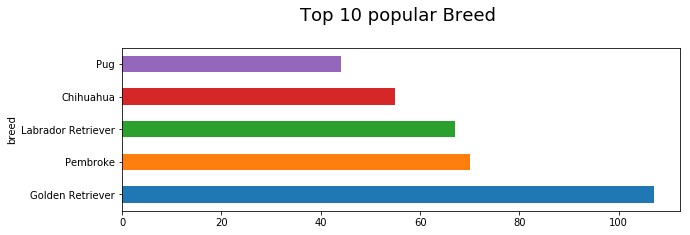

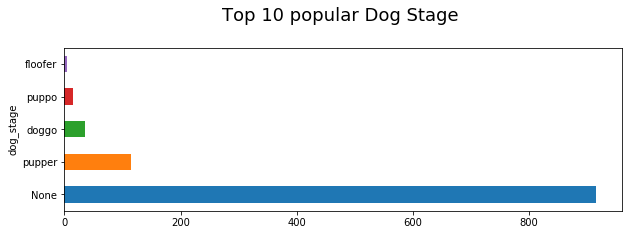

In [493]:
bar_plot_popular(df_most_retweets,'breed','Dog Breeds with most Retweets')
bar_plot_popular(df_most_retweets,'dog_stage','Dog Stage with most Retweets')

Text(0,0.5,'Breed')

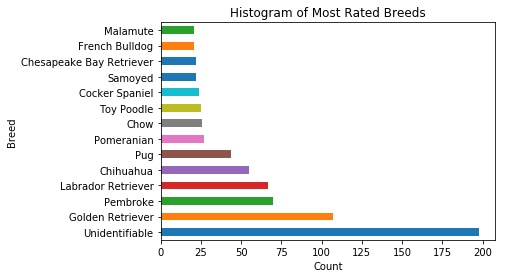

In [862]:
top_breeds=df_tweet.groupby('breed').filter(lambda x: len(x) >= 20)
top_breeds['breed'].value_counts().plot(kind = 'barh')
plt.title('Histogram of Most Rated Breeds')
plt.xlabel('Count')
plt.ylabel('Breed')

In [863]:
top_breeds.groupby('breed')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
breed,,,,,,,,
Chesapeake Bay Retriever,22.0,10.681818,1.554911,8.0,10.00,10.0,12.0,13.0
Chihuahua,55.0,10.509091,2.176241,3.0,10.00,11.0,12.0,14.0
Chow,26.0,11.230769,1.335895,7.0,10.25,11.0,12.0,13.0
Cocker Spaniel,24.0,11.166667,1.167184,9.0,10.00,11.0,12.0,13.0
French Bulldog,21.0,11.095238,1.757975,8.0,10.00,12.0,12.0,14.0
Golden Retriever,107.0,11.392523,1.794946,0.0,11.00,12.0,12.0,14.0
Labrador Retriever,67.0,11.179104,1.347561,7.0,10.00,11.0,12.0,13.0
Malamute,21.0,10.666667,1.354006,8.0,10.00,10.0,12.0,13.0
Pembroke,70.0,11.285714,1.858337,4.0,11.00,12.0,12.0,14.0


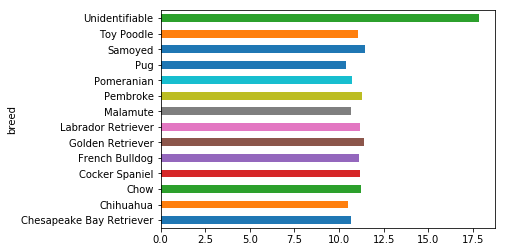

In [865]:
top_breeds.groupby('breed').mean()['rating'].plot(kind='barh')

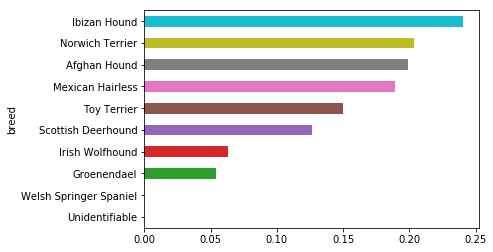

In [877]:
df_tweet.groupby('breed').mean()['conf'].nsmallest(10).plot(kind='barh')

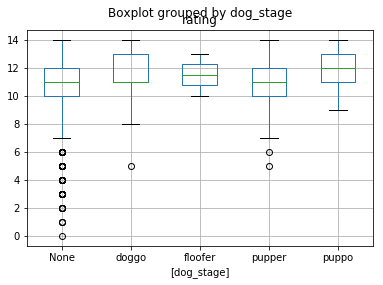

In [868]:
df_tweet[(df_tweet['rating'] <= 14)].boxplot(column=['rating'], by=['dog_stage'])

In [ ]:
scatter plot